# Using Decision tree classification technique

### Importing libraries

In [79]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Reading and cleaning data

In [111]:
data = pd.read_csv(r"C:\Users\Aarushi Wagh\Downloads\code1\codes\isolation_forest_test_data.csv")
data.tail()

,time,app_cpu_netdata_x,app_cpu_apps.plugin_x,app_cpu_tc-qos-helper_x,app_cpu_go.d.plugin_x,app_cpu_logs_x,app_cpu_ssh_x,app_cpu_time_x,app_cpu_cron_x,app_cpu_system_x,...,pgio_out,running,blocked,free,used,cached,buffers,uptime,anomaly_score,label
5041,17-08-2019 04:11,0.0000,0.9993,1.9986,0.0,0.0,0.9993,0,0,0.0,...,0.0,3,0,13897.359,397.0898,681.0234,54.78906,62084.0,-0.290622,Outlier
5042,17-08-2019 04:13,0.9986,0.9997,0.0000,0.0,0.0,0.9998,0,0,0.0,...,0.0,4,0,13962.949,331.4453,681.0586,54.80859,62158.0,-0.290622,Outlier
5043,17-08-2019 04:13,1.9980,0.9991,0.9991,0.0,0.0,0.0001,0,0,0.0,...,0.0,6,0,13935.891,358.5195,681.0430,54.80859,62161.0,-0.299818,Outlier
5044,17-08-2019 04:14,0.0000,1.0001,1.0001,0.0,0.0,0.0002,0,0,0.0,...,0.0,5,0,13641.918,652.4609,681.0547,54.82812,62227.0,-0.309119,Outlier
5045,17-08-2019 04:29,0.9989,0.9991,1.9982,0.0,0.0,0.0001,0,0,0.0,...,0.0,6,0,13810.113,439.7070,725.4258,55.01562,63155.0,-0.299818,Outlier


In [227]:
data['label'] = data['label'].replace(['Inlier', 'Outlier'],(0,1))
data.head()
X = data[["app_cpu_netdata_x","app_cpu_apps.plugin_x","app_cpu_tc-qos-helper_x","app_cpu_ssh_x","running","free","used","cached","buffers"]].values
y = data[['label']].values



### Splitting, oversampling and undersampling data

In [228]:
X_train_dtrees, X_test_dtrees, y_train_dtrees, y_test_dtrees = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train_dtrees, y_train_dtrees)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_both, y_both = undersample.fit_resample(X_over, y_over)

print(Counter(y_train_dtrees.ravel()))
print(Counter(y_over))
print(Counter(y_both))



Counter({0: 3739, 1: 45})
Counter({0: 3739, 1: 1869})
Counter({0: 2336, 1: 1869})


### Performing GridSearch to select best parameters for the model

In [199]:
clf = GridSearchCV(DecisionTreeClassifier(),{'criterion':['gini','entropy'],'min_samples_split':[10,20,30,40]})
clf.fit(X_both, y_both)
df = pd.DataFrame(clf.cv_results_)
#print(df[['param_criterion','param_min_samples_split','mean_test_score']])
clf.best_params_

{'criterion': 'gini', 'min_samples_split': 30}

### Training the model

In [229]:
data_model_dtrees = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30)
data_model_dtrees.fit(X_both, y_both)
y_predicted_dtrees = data_model_dtrees.predict(X_test_dtrees)

### Performance metrics

In [230]:
a = cross_val_score(data_model_dtrees, X_both, y_both, cv = 3, scoring = "accuracy")
print(a)
print(a.mean())

[0.9957204  0.99714693 0.99643112]
0.9964328176701446


In [231]:
print(classification_report(y_test_dtrees, y_predicted_dtrees))
print(confusion_matrix(y_test_dtrees, y_predicted_dtrees))
print(precision_score(y_test_dtrees, y_predicted_dtrees))
print(recall_score(y_test_dtrees, y_predicted_dtrees))
print(f1_score(y_test_dtrees, y_predicted_dtrees))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1247
           1       0.91      0.67      0.77        15

    accuracy                           1.00      1262
   macro avg       0.95      0.83      0.88      1262
weighted avg       0.99      1.00      0.99      1262

[[1246    1]
 [   5   10]]
0.9090909090909091
0.6666666666666666
0.7692307692307692


In [45]:
y_predicted_dtrees.shape

(1262,)

### Visualizing the results of the model by plotting predicted values and actual values

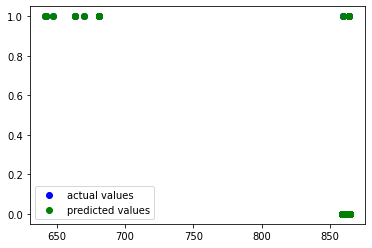

In [9]:
plt.scatter(X_test_dtrees[:,3], y_test_dtrees, color="blue", label="actual values")
plt.scatter(X_test_dtrees[:,3], y_predicted_dtrees, color="green", label="predicted values")
plt.legend()

# Using Random forest classification technique

### Splitting, oversampling and undersampling data

In [232]:
X_train_rforest, X_test_rforest, y_train_rforest, y_test_rforest = train_test_split(X, y.ravel(), test_size = 0.25, random_state=0,stratify = y)
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over_rf, y_over_rf = oversample.fit_resample(X_train_rforest, y_train_rforest)
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_both_rf, y_both_rf = undersample.fit_resample(X_over_rf, y_over_rf)

print(Counter(y_train_rforest.ravel()))
print(Counter(y_over_rf))
print(Counter(y_both_rf))


Counter({0: 3739, 1: 45})
Counter({0: 3739, 1: 1869})
Counter({0: 2336, 1: 1869})


### Performing GridSearch to select best parameters for the model

In [210]:
clf_rf = GridSearchCV(RandomForestClassifier(),{'criterion':['gini','entropy'],'n_estimators':[5,10,20,30,40]})
clf_rf.fit(X_both, y_both.ravel())
df = pd.DataFrame(clf_rf.cv_results_)
#print(df[['param_criterion','param_n_estimators','mean_test_score']])
clf_rf.best_params_

{'criterion': 'gini', 'n_estimators': 10}

### Training the model

In [233]:
data_model_rforest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10)
data_model_rforest.fit(X_both_rf, y_both_rf)
y_predicted_rforest = data_model_rforest.predict(X_test_rforest)
#print("mse= ", mean_squared_error(y_test_rforest, y_predicted_rforest))

### Performance metrics

In [234]:
b = cross_val_score(data_model_rforest, X_both_rf, y_both_rf, cv = 3, scoring = "accuracy")
print(b)
print(b.mean())

[0.9978602 1.        1.       ]
0.9992867332382311


In [235]:
print(classification_report(y_test_rforest, y_predicted_rforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1247
           1       0.92      0.73      0.81        15

    accuracy                           1.00      1262
   macro avg       0.96      0.87      0.91      1262
weighted avg       1.00      1.00      1.00      1262



In [236]:
print(confusion_matrix(y_test_rforest, y_predicted_rforest))
print(precision_score(y_test_rforest, y_predicted_rforest))
print(recall_score(y_test_rforest, y_predicted_rforest))
print(f1_score(y_test_rforest, y_predicted_rforest))

[[1246    1]
 [   4   11]]
0.9166666666666666
0.7333333333333333
0.8148148148148148


### Visualizing the results of the model by plotting predicted values and actual values

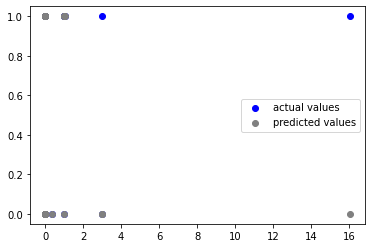

In [237]:
plt.scatter(X_test_rforest[:,3], y_test_rforest, color="blue", label="actual values")
plt.scatter(X_test_rforest[:,3], y_predicted_rforest, color="grey", label="predicted values")
plt.legend()